# Sales Report Suspiciousness Detection : Exploratory Data Analysis using visualizations


## Problem Description



### Analysis Objectives



### Data Set Description



### Considerations / Assumptions



### Algorithm Class



### Given constraints



### Main Tasks




## Import libraries

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
import warnings
import os
import random
import matplotlib.pyplot as plt     
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as impipe
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc, accuracy_score,classification_report, recall_score,precision_score,precision_recall_curve,average_precision_score, silhouette_score,roc_curve, auc,confusion_matrix,mean_absolute_error,mean_squared_error,roc_auc_score,f1_score, precision_recall_fscore_support
from sklearn.model_selection import learning_curve
import graphviz
from sklearn import tree
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot




## Set Environment for Execution

In [2]:
def set_env_var():
    InteractiveShell.ast_node_interactivity = "all"
    warnings.filterwarnings('ignore')
    os.environ['KMP_DUPLICATE_LIB_OK']='True'
    pd.set_option('display.max_rows', 60)
    pd.set_option('display.max_columns', 60)
    init_notebook_mode(connected=True)
    %matplotlib inline


set_env_var()


## Set Seed for consistent execution

In [3]:
def set_seed(seed=777):
    return random.seed(seed)

seed_constant = 776
set_seed(seed_constant)


## Import required data 

In [4]:
def data_importer_xlsx(data_path, na_values=[]):
    dataF = pd.read_excel(data_path, na_values=na_values)
    print("The number of Rows in the Data set  = "+str(dataF.shape[0]))
    print("The number of Columns in the data set = " +str(dataF.shape[1]))
    return dataF

salesReportData=data_importer_xlsx("/Users/samyam/Documents/Samya/GIT/insofe/Final_PHD/PHD_TrainData_and_ProblemStatement_actual/Train.xlsx")

The number of Rows in the Data set  = 42582
The number of Columns in the data set = 6


## Split data for analysis

In [5]:
#salesReportDataTrain, salesReportDataTestVal = train_test_split(salesReportData, test_size=0.2, random_state=seed_constant, stratify=salesReportData['Suspicious'])
#salesReportDataValidate, salesReportDataTest = train_test_split(salesReportDataTestVal, test_size=0.5, random_state=seed_constant, stratify=salesReportDataTestVal['Suspicious'])

salesReportDataTrain, salesReportDataTest = train_test_split(salesReportData, test_size=0.15, random_state=seed_constant, stratify=salesReportData['Suspicious'])

print("Train Set shape :",salesReportDataTrain.shape)
print("Test Set shape :",salesReportDataTest.shape)

Train Set shape : (36194, 6)
Test Set shape : (6388, 6)


## Feature Analysis of given data

In [6]:
def data_description(dataF):
    print("The columns in the data set are : \n",list(dataF.columns))
    print("The data types of the columns are :\n\n",dataF.dtypes)
    
data_description(salesReportDataTrain)

The columns in the data set are : 
 ['ReportID', 'SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue', 'Suspicious']
The data types of the columns are :

 ReportID           object
SalesPersonID      object
ProductID          object
Quantity            int64
TotalSalesValue     int64
Suspicious         object
dtype: object


### Check the first and last 5 rows in dataset to get an understanding of data

In [7]:
salesReportDataTrain.head()
salesReportDataTrain.tail()

ReportID SalesPersonID ProductID  Quantity  TotalSalesValue  \
26235  Rep36336        C21448    PR6235       163             1890   
9840   Rep19941        C22174    PR6326        82             1165   
26954  Rep37055        C21236    PR6675       305            32915   
21044  Rep31145        C21387    PR6253       101             1010   
5175   Rep15276        C22185    PR6211       481             2110   

          Suspicious  
26235  indeterminate  
9840   indeterminate  
26954  indeterminate  
21044  indeterminate  
5175   indeterminate

ReportID SalesPersonID ProductID  Quantity  TotalSalesValue  \
4393   Rep14494        C22000    PR6329       272             8460   
30329  Rep40430        C21699    PR6675       104             1345   
33999  Rep44100        C21823    PR6697      7064            35160   
19672  Rep29773        C21638    PR6253       103             1005   
23007  Rep33108        C21189    PR6223       612             7340   

          Suspicious  
4393   indeterminate  
30329  indeterminate  
33999  indeterminate  
19672  indeterminate  
23007  indeterminate

### Random Sample rows

In [8]:
def get_data_sample(dataF, num_sample=10):
    return pd.DataFrame(dataF.sample(num_sample))

get_data_sample(salesReportDataTrain)

ReportID SalesPersonID ProductID  Quantity  TotalSalesValue  \
36184  Rep46285        C21534    PR6353       186             7705   
21675  Rep31776        C22273    PR6219       165             2055   
19423  Rep29524        C22287    PR6518     39462            18125   
5528   Rep15629        C22030    PR6338     11780            44185   
26678  Rep36779        C21235    PR6671       141             2185   
37173  Rep47274        C21839    PR6353       119             1875   
598    Rep10699        C21976    PR6151       100             1030   
41598  Rep51699        C21788    PR6701     11060            73050   
17621  Rep27722        C21791    PR6578       820             1915   
35560  Rep45661        C21453    PR6298     14942           103015   

          Suspicious  
36184  indeterminate  
21675  indeterminate  
19423  indeterminate  
5528   indeterminate  
26678  indeterminate  
37173  indeterminate  
598    indeterminate  
41598  indeterminate  
17621  indeterminate  
35560  indeterminate

### Distribution of target attribute

indeterminate    33868
No                2172
Yes                154
Name: Suspicious, dtype: int64
indeterminate    93.573520
No                6.000995
Yes               0.425485
Name: Suspicious, dtype: float64


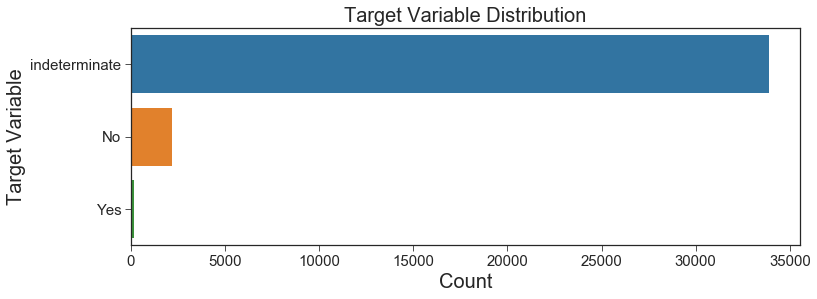

In [9]:
def plot_data_dist_across_targ(dataF, target):
    """
    Plot target variable distribution
    """
    
    print(dataF[target].value_counts())
    print((dataF[target].value_counts()/dataF[target].count())*100)
    
    plt.figure(figsize=(12,4))
    plt.style.use('seaborn-ticks')
    plot_1 = sns.countplot(y=target, data=dataF, order = dataF[target].value_counts().index);
    plot_1.axes.set_title("Target Variable Distribution",fontsize=20);
    plot_1.set_xlabel("Count",fontsize=20);
    plot_1.set_ylabel("Target Variable",fontsize=20);
    plot_1.tick_params(labelsize=15);
    plt.show();

    
plot_data_dist_across_targ(salesReportDataTrain, "Suspicious")

### Check count of null in each column & its percent

In [10]:
def get_null_count_per_attribute(dataF): 
    return pd.DataFrame({'total_missing': dataF.isnull().sum(), 
                         'perc_missing': (dataF.isnull().sum()/dataF.shape[0])*100}).sort_values(
        by=['perc_missing'], ascending=False)

get_null_count_per_attribute(salesReportDataTrain)

total_missing  perc_missing
ReportID                     0           0.0
SalesPersonID                0           0.0
ProductID                    0           0.0
Quantity                     0           0.0
TotalSalesValue              0           0.0
Suspicious                   0           0.0

### Check for count of unique values in different attriutes

In [11]:
def get_unique_value_count_per_attribute(dataF): 
    return pd.DataFrame((dataF.nunique()/dataF.shape[0])*100).rename(
        {0: 'perc_unique'}, axis=1).sort_values(by=['perc_unique'])

get_unique_value_count_per_attribute(salesReportDataTrain)

perc_unique
Suspicious          0.008289
ProductID           1.638393
SalesPersonID       2.735260
Quantity           16.397745
TotalSalesValue    19.533624
ReportID          100.000000

### Distribution of product sales?

In [12]:
data_sample = salesReportDataTrain

salesReportDataTrain_Yes = data_sample[data_sample.Suspicious=='Yes']
salesReportDataTrain_No = data_sample[data_sample.Suspicious=='No']
salesReportDataTrain_Indeterminate = data_sample[data_sample.Suspicious=='indeterminate']

data = [
        {
            'x': data_sample[data_sample['Suspicious']==suspicious]['ProductID'],
            'y': data_sample[data_sample['Suspicious']==suspicious]['TotalSalesValue'],
            'name': suspicious, 'mode': 'markers',
        } for suspicious in ['Yes', 'No', 'indeterminate']
    ]


layout = go.Layout(title = ' TotalSalesValue distribution across ProductID',
                  xaxis = dict(title = 'ProductID'),
                  yaxis = dict(title = 'TotalSalesValue'))

fig = go.Figure(data=data, layout=layout)
iplot(fig)


__Observation__
1. Majority of Suspicious=Yes as either the having Very High TotalSalesValue for any of the ProductID.
2. No Specific ProductID observed with very high Suspicious=Yes.

### Dedup dataset

Identify and drop rows that are duplicate after dropping ReportID

In [14]:
def isDuplicatesPresent(dataF, dropSegColumn=[]):
    print("The number of Rows in the Data set  = "+str(dataF.shape[0]))
    print("The number of Rows in the Dedup Data set  = "+str(dataF.drop(dropSegColumn, axis=1).drop_duplicates().shape[0]))
    
isDuplicatesPresent(salesReportDataTrain, dropSegColumn = "ReportID")

The number of Rows in the Data set  = 36194
The number of Rows in the Dedup Data set  = 28390


### Distribution of target for same independent variables

In [15]:
salesReportDataTrain_identify_suspicious_redundancy = salesReportDataTrain.drop(
    'ReportID', axis=1).drop_duplicates().groupby(
    ['SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue']).count().reset_index().rename(
    columns= {'Suspicious' : 'count_Suspicious'})

salesReportDataTrain_identify_suspicious_redundancy[
    salesReportDataTrain_identify_suspicious_redundancy['count_Suspicious'] > 1]

SalesPersonID ProductID  Quantity  TotalSalesValue  count_Suspicious
13           C21118    PR6202    192866           384780                 2
188          C21128    PR6437      1226           210450                 2
274          C21133    PR6253       101             1395                 2
523          C21145    PR6253       100             1122                 2
535          C21145    PR6253       111             1075                 2
555          C21145    PR6253       570             6295                 2
557          C21145    PR6399       227             5875                 2
578          C21145    PR6595       103             1040                 2
589          C21145    PR6596       106             1215                 2
615          C21145    PR6623       100             1010                 2
619          C21145    PR6623       103             1060                 2
630          C21145    PR6623       131             1315                 2
1105         C21167    PR6399        70             1010                 2
1135         C21167    PR6596       103             2005                 2
1136         C21167    PR6596       104             1195                 2
1889         C21185    PR6595       127             1015                 2
2643         C21212    PR6253       113             1685                 2
2654         C21212    PR6253       277             2850                 2
2655         C21212    PR6253       293             2180                 2
2676         C21212    PR6595       102             1055                 2
2681         C21212    PR6596       103             1030                 2
2683         C21212    PR6596       107             1160                 2
2695         C21212    PR6596       151             1785                 2
2738         C21213    PR6596       108             1240                 2
3059         C21220    PR6595      1767             1335                 2
3070         C21220    PR6596      2175             5320                 2
3126         C21221    PR6623       108             1015                 2
3156         C21222    PR6595       101             1020                 2
3471         C21231    PR6229       101             1030                 2
3475         C21231    PR6596       101             1015                 2
...             ...       ...       ...              ...               ...
15872        C21898    PR6253       125             1455                 2
15894        C21898    PR6253      1168             9415                 2
15924        C21898    PR6368       242             7940                 2
16685        C21935    PR6374       103            35855                 2
16847        C21938    PR6392       119             7940                 2
17083        C21953    PR6187      2544            21380                 2
17657        C21976    PR6253       288             6600                 2
17670        C21976    PR6282       102             1235                 2
17907        C21976    PR6383       102             2470                 2
17961        C21976    PR6399       101             1100                 2
17964        C21976    PR6400        67             1040                 2
17980        C21976    PR6590       100             2515                 2
17983        C21976    PR6595        88             1005                 2
17984        C21976    PR6595        88             1010                 2
18536        C21989    PR6253       259             3215                 2
18549        C21989    PR6253      3475             9875                 2
18575        C21989    PR6596      1154             9585                 2
21894        C22138    PR6253       138             1890                 2
21896        C22138    PR6253       173             2605                 2
22851        C22191    PR6253       127             3425                 2
23501        C22209    PR6253      1455            69700                 2
23509        C22209    PR6350  

__Observations__

1. Data is highly imbalanced based on target(Suspicious)
2. No missing values in any field.
3. ReportID is unique across all rows, hence can be dropped.
4. Same data sent as part of multiple reports. Hence drop those data points.
5. SalesPersonID, ProductID is not unique
6. There are many scenarios when the same data point is assigned two different Suspicious levels.

### Drop attributes and rows
__That are monotonically increasing or having many nulls or that doesn't have significance to analysis__

__Action__

1. Drop ReportID column.

In [16]:
salesReportDataTrain_dropped_attr = salesReportDataTrain.drop(['ReportID'], axis=1)
salesReportDataTrain_dropped_attr.head()


SalesPersonID ProductID  Quantity  TotalSalesValue     Suspicious
26235        C21448    PR6235       163             1890  indeterminate
9840         C22174    PR6326        82             1165  indeterminate
26954        C21236    PR6675       305            32915  indeterminate
21044        C21387    PR6253       101             1010  indeterminate
5175         C22185    PR6211       481             2110  indeterminate

2. Drop duplicate rows

In [17]:
salesReportDataTrain_dropped_attr_no_dup = salesReportDataTrain_dropped_attr.drop_duplicates()
salesReportDataTrain_dropped_attr_no_dup.shape
salesReportDataTrain_dropped_attr_no_dup.head()

(28390, 5)

SalesPersonID ProductID  Quantity  TotalSalesValue     Suspicious
26235        C21448    PR6235       163             1890  indeterminate
9840         C22174    PR6326        82             1165  indeterminate
26954        C21236    PR6675       305            32915  indeterminate
21044        C21387    PR6253       101             1010  indeterminate
5175         C22185    PR6211       481             2110  indeterminate

### Distribution of target attribute after de-dup

indeterminate    26389
No                1847
Yes                154
Name: Suspicious, dtype: int64
indeterminate    92.951744
No                6.505812
Yes               0.542445
Name: Suspicious, dtype: float64


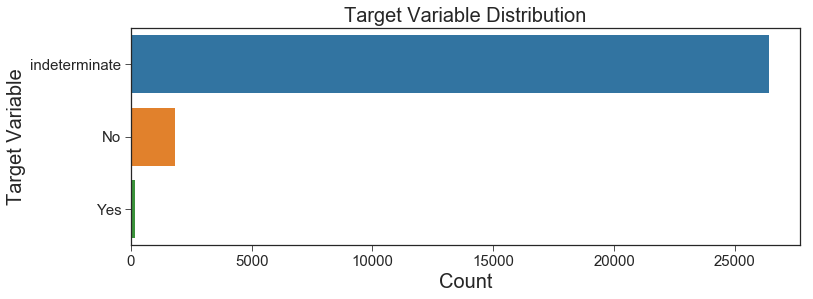

In [18]:
plot_data_dist_across_targ(salesReportDataTrain_dropped_attr_no_dup, "Suspicious")

### DataType Conversions

__Observations__

__1. Categorical datatype:__
SalesPersonID, ProductID, Suspicious

__2. Numeric datatype:__
Quantity, TotalSalesValue

In [19]:
salesReportDataTrain_dropped_attr_no_dup.dtypes

SalesPersonID      object
ProductID          object
Quantity            int64
TotalSalesValue     int64
Suspicious         object
dtype: object

In [20]:
cat_col = ['SalesPersonID', 'ProductID', 'Suspicious']
num_col = np.setdiff1d(salesReportDataTrain_dropped_attr_no_dup.columns, cat_col).tolist()

cat_col
num_col


['SalesPersonID', 'ProductID', 'Suspicious']

['Quantity', 'TotalSalesValue']

In [21]:
def covert_var(dataF, conversion_type):
    if(conversion_type=="cat"):
        converted_dataF = dataF.astype('category', copy=True)
    if(conversion_type=="num_float"):
        converted_dataF = dataF.astype('float64', copy=True)
    if(conversion_type=="num_int"):
        converted_dataF = dataF.astype('int64', copy=True)
    return converted_dataF


In [22]:
#Do the datatype conversion
salesReportDataTrain_dropped_attr_no_dup[cat_col] = covert_var(salesReportDataTrain_dropped_attr_no_dup[cat_col], "cat")
salesReportDataTrain_dropped_attr_no_dup[num_col] = covert_var(salesReportDataTrain_dropped_attr_no_dup[num_col], "num_float")    

salesReportDataTrain_dropped_attr_no_dup.head()
salesReportDataTrain_dropped_attr_no_dup.dtypes

SalesPersonID ProductID  Quantity  TotalSalesValue     Suspicious
26235        C21448    PR6235     163.0           1890.0  indeterminate
9840         C22174    PR6326      82.0           1165.0  indeterminate
26954        C21236    PR6675     305.0          32915.0  indeterminate
21044        C21387    PR6253     101.0           1010.0  indeterminate
5175         C22185    PR6211     481.0           2110.0  indeterminate

SalesPersonID      category
ProductID          category
Quantity            float64
TotalSalesValue     float64
Suspicious         category
dtype: object

### Correlation Analysis
#### Between numeric attributes

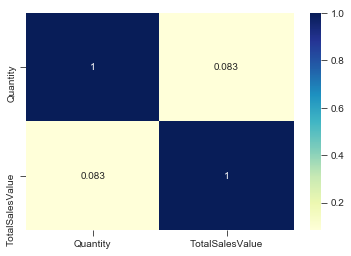

In [23]:
def get_correlation_plot(dataF):
    corr = dataF.corr()
    f, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(corr, ax=ax, annot=True, cmap="YlGnBu");

get_correlation_plot(salesReportDataTrain_dropped_attr_no_dup)

#### Correlation of different continuous attributes to target

In [24]:
def logistic_regg_Corr(dataF, target, solver='liblinear'):
    """
    This is to understand correlation between continuous IV & Categorical DV.
    """
    dataF_corr = dataF.dropna()
    X=dataF_corr.drop(target, axis=1)
    y=dataF_corr[target]
    for col_cor in X.columns :
        X_col_cor = X[col_cor].values.reshape(-1, 1)
        clf = LogisticRegression(random_state=0, solver=solver).fit(X_col_cor, y)
        print("Mean accuracy with column", col_cor, "is :", clf.score(X_col_cor, y))

In [25]:
salesReportDataTrain_dropped_attr_no_dup_target = pd.concat([salesReportDataTrain_dropped_attr_no_dup[num_col].reset_index(
    drop=True), salesReportDataTrain_dropped_attr_no_dup['Suspicious'].reset_index(drop=True)], axis=1)
logistic_regg_Corr(salesReportDataTrain_dropped_attr_no_dup_target, "Suspicious", solver='lbfgs')

Mean accuracy with column Quantity is : 0.9295174357168017
Mean accuracy with column TotalSalesValue is : 0.9288481859809792


#### Correlation of different categorical attributes to target

In [26]:
def get_chi_square_corr_score(dataF, target, prob=0.95):
    """
    The Pearson’s chi-squared statistical hypothesis is an example of a test for independence between 
    categorical variables.
    """
    le = LabelEncoder()
    le.fit(dataF[target])
    dataF[target] = le.transform(dataF[target])
    
    alpha = 1.0 - prob
    print('Confidence level=%.3f and significance level=%.3f \n' % (prob, alpha))
    
    for column in dataF.columns.drop('Suspicious'):
        dataF[column].fillna(dataF[column].mode()[0], inplace=True)
        table = pd.crosstab(dataF[column], dataF[target])
        stat, p, dof, expected = chi2_contingency(table)
        
        """
        critical = chi2.ppf(prob, dof)
        print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
        
        if abs(stat) >= critical:
            print('Dependent (reject H0), IV & DV are dependent')
        else:
            print('Independent (fail to reject H0), IV & DV are independent')
        """
        if p <= alpha:
            #print('Dependent (reject H0), IV & DV are dependent')
            print('IV : %s and DV: %s are dependent' % (column, target))
        else:
            #print('Independent (fail to reject H0), IV & DV are independent')
            print('IV : %s and DV: %s are independent' % (column, target))

In [27]:
get_chi_square_corr_score(salesReportDataTrain_dropped_attr_no_dup[cat_col], 'Suspicious', prob=0.99)

Confidence level=0.990 and significance level=0.010 

IV : SalesPersonID and DV: Suspicious are dependent
IV : ProductID and DV: Suspicious are dependent


__Observation__

1. There is no direct correlation between Quantity and TotalSalesValue as expected, there are multiple ProductID and SalesPersonID responsible for selling of products.
2. Accuracy of predicting target using __Quantity__ is high (~92%), but due to class imbalance of target (93% majority), its insignificant.
3. Accuracy of predicting target using __TotalSalesValue__ is high (~92%), but due to class imbalance of target (93% majority), its insignificant.
4. __SalesPersonID and target = Suspicious__ are highly dependent at 99% Confidence level.
5. __ProductID and target = Suspicious__ are highly dependent at 99% Confidence level.
6. There are scenarios when the same data ('SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue') is assigned two different Suspicious value
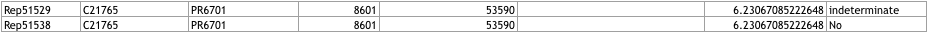

## Implement Base algorithm

In [28]:
salesReportDataTrain_dropped_attr_no_dup.dtypes

SalesPersonID      category
ProductID          category
Quantity            float64
TotalSalesValue     float64
Suspicious         category
dtype: object

### Segment the data into IV & DV

In [29]:
X_train = salesReportDataTrain_dropped_attr_no_dup.drop('Suspicious', axis=1)
y_train = salesReportDataTrain_dropped_attr_no_dup['Suspicious']

### Building Pipeline

In [30]:
num_col_split = list(X_train.select_dtypes(include='float').columns)
cat_col_split = list(X_train.select_dtypes(include='category').columns)

num_col_split
cat_col_split

['Quantity', 'TotalSalesValue']

['SalesPersonID', 'ProductID']

### Impute and scale attributes

In [31]:
def define_num_transformer(**transformers):
    steps=[]
    for key, value in transformers.items():
        if(key == "imputer"):
            steps.append((key, SimpleImputer(strategy=value)))
        elif(key == "scaler"):
            steps.append((key, StandardScaler()))
        else:
            return "Not a valid transformation"    
    return Pipeline(memory ='./' ,steps=steps)


def define_cat_transformer(**transformers):
    steps=[]
    for key, value in transformers.items():
        if(key == "imputer"):
            steps.append(('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')))
        elif(key == "dummyfication_onehot"):
            steps.append(('onehot', OneHotEncoder(handle_unknown='ignore')))
        else:
            return "Not a valid transformation"
    return Pipeline(memory ='./' ,steps=steps)


def get_column_transformer(num_transformer=None, num_col_split=None, cat_transformer=None, cat_col_split=None):
    transformer_step=[]
    if(num_transformer != None):
        transformer_step.append(('num', num_transformer, num_col_split))
    if(cat_transformer != None):
        transformer_step.append(('cat', cat_transformer, cat_col_split))
    return ColumnTransformer(transformers=transformer_step)        


In [32]:
num_transformer_step = {"scaler":"StandardScaler"}
num_transformer = define_num_transformer(**num_transformer_step)

cat_transformer_step = {"dummyfication_onehot":"OneHotEncoder"}
cat_transformer = define_cat_transformer(**cat_transformer_step)

preprocessor = get_column_transformer(num_transformer, num_col_split, cat_transformer, cat_col_split)
preprocessor

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory='./',
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['Quantity', 'TotalSalesValue']), ('cat', Pipeline(memory='./',
     steps=[('onehot', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=True))]), ['SalesPersonID', 'ProductID'])])

### Build pipeline

In [33]:
def add_to_pipeline(**final_pipeline_steps):
    steps=[]
    for key, value in final_pipeline_steps.items():
        if(key == "preprocessor"):
            steps.append(('preprocessor', value))
        elif(key == "baseModel"):
            steps.append(('classifier', value))
        else:
            return "Not a valid step"
    return impipe(steps=steps)


In [34]:
#Pipeline steps to be added to imBalance pipeline
baseModel = LogisticRegression()
steps = {"preprocessor" : preprocessor, "baseModel": baseModel}
im_pipe_clf = add_to_pipeline(**steps)

### Grid Search

In [35]:
def simple_calssification_grid_space():
    return [{'classifier': [LogisticRegression()],
             'classifier__C': [3,7],
             'classifier__penalty': ["l1","l2"],
             'classifier__class_weight': [None, "balanced"]},
            {'classifier': [DecisionTreeClassifier(random_state=0)],
             'classifier__max_depth': [2,3,5,9],
             'classifier__class_weight': [None, "balanced"]}]

In [36]:
#Search Space for base classifier
search_space = simple_calssification_grid_space()

#Define repeated KFold
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)

"""
'micro':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
"""


CV_grid_model = GridSearchCV(
    estimator=im_pipe_clf, param_grid=search_space, cv= rkf, scoring='recall_macro', n_jobs=-1, verbose=3, refit=True)
CV_grid_model.fit(X=X_train, y=y_train)


"\n'micro':\nCalculate metrics globally by counting the total true positives, false negatives and false positives.\n\n'macro':\nCalculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.\n\n'weighted':\nCalculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.\n"

Fitting 30 folds for each of 16 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  2.0min finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x1a27720da0>,
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory='./',
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['Quantity', 'TotalSalesValue']),...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'classifier': [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)], 'class...er='best')], 'classifier__max_depth': [2, 3, 5, 9], 'classifier__c

In [37]:
def get_grid_summary(gs_model):
    print('Best score = ', gs_model.best_score_)
    print('\n')
    
    print('Best parameter : ')
    print(gs_model.best_params_)    
    print('\n')
    
    print('Best Model : ')
    print(gs_model.best_estimator_.get_params()['classifier'])
    print('\n')
    
    print('Grid search execution stat :')
    return pd.DataFrame(gs_model.cv_results_)

In [38]:
get_grid_summary(CV_grid_model)

Best score =  0.7030829511298806


Best parameter : 
{'classifier': DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'), 'classifier__class_weight': 'balanced', 'classifier__max_depth': 9}


Best Model : 
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


Grid search execution stat :


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.439895      0.074463         0.032317        0.003244   
1        0.927548      0.172043         0.033307        0.003390   
2        4.440234      0.248259         0.037442        0.004667   
3        1.382629      0.165958         0.037572        0.004426   
4        2.972777      0.139115         0.036099        0.003495   
5        0.991660      0.125956         0.033651        0.003335   
6        9.661049      0.893029         0.042200        0.006449   
7        1.697733      0.148725         0.048984        0.003780   
8        0.196533      0.006534         0.046109        0.002960   
9        0.222417      0.011396         0.048104        0.005092   
10       0.238053      0.010665         0.043811        0.002201   
11       0.306621      0.007953         0.044888        0.003413   
12       0.241915      0.006157         0.044647        0.003677   
13       0.255701      0.005086         0.044184        0.002930   
14       0.314877      0.008771         0.045072        0.003504   
15       0.413365      0.023073         0.042462        0.004625   

                                     param_classifier param_classifier__C  \
0   LogisticRegression(C=1.0, class_weight=None, d...                   3   
1   LogisticRegression(C=1.0, class_weight=None, d...                   3   
2   LogisticRegression(C=1.0, class_weight=None, d...                   3   
3   LogisticRegression(C=1.0, class_weight=None, d...                   3   
4   LogisticRegression(C=1.0, class_weight=None, d...                   7   
5   LogisticRegression(C=1.0, class_weight=None, d...                   7   
6   LogisticRegression(C=1.0, class_weight=None, d...                   7   
7   LogisticRegression(C=1.0, class_weight=None, d...                   7   
8   DecisionTreeClassifier(class_weight='balanced'...                 NaN   
9   DecisionTreeClassifier(class_weight='balanced'...                 NaN   
10  DecisionTreeClassifier(class_weight='balanced'...                 NaN   
11  DecisionTreeClassifier(class_weight='balanced'...                 NaN   
12  DecisionTreeClassifier(class_weight='balanced'...                 NaN   
13  DecisionTreeClassifier(class_weight='balanced'...                 NaN   
14  DecisionTreeClassifier(class_weight='balanced'...                 NaN   
15  DecisionTreeClassifier(class_weight='balanced'...                 NaN   

   param_classifier__class_weight param_classifier__penalty  \
0                            None                        l1   
1                            None                        l2   
2                        balanced                        l1   
3                        balanced                        l2   
4                            None                        l1   
5                            None                        l2   
6                        balanced                        l1   
7                        balanced                        l2   
8                            None                       NaN   
9                            None                       NaN   
10                           None                       NaN   
11                           None                       NaN   
12                       balanced                       NaN   
13                       balanced                       NaN   
14                       balanced                       NaN   
15                       balanced                       NaN   

   param_classifier__max_depth  \
0                          NaN   
1                          NaN   
2                          NaN   
3                          NaN   
4                          NaN   
5                          NaN   
6                          NaN   
7                          NaN   
8                            2   
9                            3   
10                           5   
11                           9   
12                     

### Plot Learning curve

In [39]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize = (8,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='recall_macro')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()


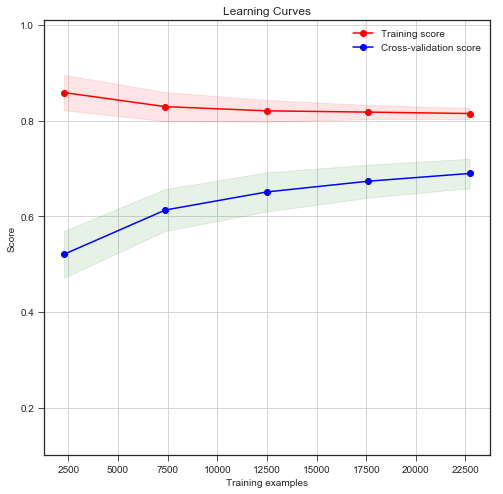

In [40]:
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)


steps = {"preprocessor" : preprocessor}
im_pipe_pre_process = add_to_pipeline(**steps)
estimator = CV_grid_model.best_estimator_.get_params()['classifier']
title = r"Learning Curves"
plot_learning_curve(estimator, title, im_pipe_pre_process.fit_transform(X_train), y_train, 
                       (0.1, 1.01), cv=cv, n_jobs=-1)

### Training data evaluation

In [41]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    print("Accuracy score :", accuracy_score(y,y_pred))
    print("classification_report :\n",classification_report(y,y_pred,digits=4))
    return y_pred

In [42]:
y_pred = evaluate_model(CV_grid_model, X_train, y_train)
y_pred

Accuracy score : 0.652060584712927
classification_report :
                precision    recall  f1-score   support

           No     0.1461    0.8468    0.2492      1847
          Yes     0.2381    0.9740    0.3827       154
indeterminate     0.9850    0.6366    0.7733     26389

    micro avg     0.6521    0.6521    0.6521     28390
    macro avg     0.4564    0.8191    0.4684     28390
 weighted avg     0.9264    0.6521    0.7371     28390



array(['indeterminate', 'No', 'No', ..., 'No', 'No', 'indeterminate'],
      dtype=object)

__Observations__

1. DecisionTreeClassifier performs the best amongst the tried classifiers.
2. A learning curve shows how error changes as the training set size increases. Learning curves give us an opportunity to diagnose bias and variance in supervised learning models.
3. The training scores plateaus at 80% and the validation scores is tending towards the test score. __High Bias Problem__. As we are classifying a given report by a salesman as Suspicious, we need to be absolutely sure before defaming, hence VERY high Recall required.
4. With more data added the the validation score can eventually reach the test score level of ~80%.
5. The train score is 80%, hence ~20% error, which needs to reduce. Hence a high bias problem (Again this call is influenced by business.) 
6. As its a high bias problem, training the current learning algorithm on more features, should lower the bias by increasing the model’s complexity.
7. We should also try out boosting algo like GBT etc.

### Evaluate the model on test data

In [43]:
#Drop ReportID column, as in case of train
salesReportDataTest_dropped_attr_no_dup = salesReportDataTest.drop(['ReportID'], axis=1)

# Datatype conversions
salesReportDataTest_dropped_attr_no_dup[cat_col] = covert_var(salesReportDataTest_dropped_attr_no_dup[cat_col], "cat")
salesReportDataTest_dropped_attr_no_dup[num_col] = covert_var(salesReportDataTest_dropped_attr_no_dup[num_col], "num_float")    

X_test = salesReportDataTest_dropped_attr_no_dup.drop('Suspicious', axis=1)
y_test = salesReportDataTest_dropped_attr_no_dup['Suspicious']


y_test_pred = evaluate_model(CV_grid_model, X_test, y_test)
y_test_pred

Accuracy score : 0.6504383218534753
classification_report :
                precision    recall  f1-score   support

           No     0.1303    0.8068    0.2243       383
          Yes     0.1695    0.7407    0.2759        27
indeterminate     0.9815    0.6400    0.7748      5978

    micro avg     0.6504    0.6504    0.6504      6388
    macro avg     0.4271    0.7292    0.4250      6388
 weighted avg     0.9271    0.6504    0.7397      6388



array(['No', 'indeterminate', 'indeterminate', ..., 'No', 'No',
       'indeterminate'], dtype=object)

### Confusion matrix

In [44]:
def plot_confusion_matrix(y, y_pred):
    lables = list(set(y))
    ax= plt.subplot()
    cm = confusion_matrix(y, y_pred,lables)
    sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu");
    print(cm)
    
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(lables);
    ax.yaxis.set_ticklabels(lables);


[[  20    5    2]
 [   4  309   70]
 [  94 2058 3826]]


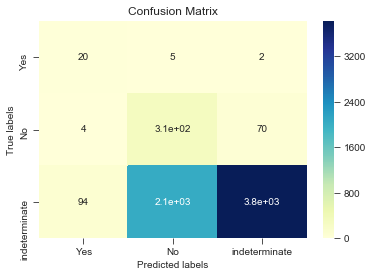

In [45]:
plot_confusion_matrix(y_test,y_test_pred)

### ROC/ AUC 
Evaluate selected model

### Precision_recall curve
Usefull in our secenario of imbalanced data.

__Observation__
1. Recall of 75 % (Suspicious=YES) is observed on test data.

## Approach 2 
__Drop rows that have more than one Independent variable for the same Dependent variable__

In [46]:
salesReportDataTrain_identify_suspicious_redundancy_1 = salesReportDataTrain.drop(
    'ReportID', axis=1).drop_duplicates(keep='first')
print(salesReportDataTrain.shape)
print(salesReportDataTrain_identify_suspicious_redundancy_1.shape)

(36194, 6)
(28390, 5)


In [47]:
# Remove rows with more than one Independent variable for the same Dependent variable
salesReportDataTrain_identify_suspicious_redundancy = salesReportDataTrain_identify_suspicious_redundancy_1.drop_duplicates(
    subset=['SalesPersonID', 'ProductID','Quantity', 'TotalSalesValue'], keep="last")
salesReportDataTrain_identify_suspicious_redundancy.shape

(28280, 5)

In [48]:
cat_col = ['SalesPersonID', 'ProductID', 'Suspicious']
num_col = np.setdiff1d(salesReportDataTrain_identify_suspicious_redundancy.columns, cat_col).tolist()

cat_col
num_col


['SalesPersonID', 'ProductID', 'Suspicious']

['Quantity', 'TotalSalesValue']

In [49]:
salesReportDataTrain_identify_suspicious_redundancy[cat_col] = covert_var(salesReportDataTrain_identify_suspicious_redundancy[cat_col], "cat")
salesReportDataTrain_identify_suspicious_redundancy[num_col] = covert_var(salesReportDataTrain_identify_suspicious_redundancy[num_col], "num_float")    

salesReportDataTrain_identify_suspicious_redundancy.head()
salesReportDataTrain_identify_suspicious_redundancy.dtypes


SalesPersonID ProductID  Quantity  TotalSalesValue     Suspicious
26235        C21448    PR6235     163.0           1890.0  indeterminate
9840         C22174    PR6326      82.0           1165.0  indeterminate
21044        C21387    PR6253     101.0           1010.0  indeterminate
5175         C22185    PR6211     481.0           2110.0  indeterminate
2787         C21167    PR6596     132.0           3015.0  indeterminate

SalesPersonID      category
ProductID          category
Quantity            float64
TotalSalesValue     float64
Suspicious         category
dtype: object

In [50]:
X_train = salesReportDataTrain_identify_suspicious_redundancy.drop('Suspicious', axis=1)
y_train = salesReportDataTrain_identify_suspicious_redundancy['Suspicious']

In [51]:
#Search Space for base classifier
search_space = simple_calssification_grid_space()

#Define repeated KFold
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)

"""
'micro':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
"""


CV_grid_model = GridSearchCV(
    estimator=im_pipe_clf, param_grid=search_space, cv= rkf, scoring='recall_macro', n_jobs=-1, verbose=3, refit=True)
CV_grid_model.fit(X=X_train, y=y_train)

"\n'micro':\nCalculate metrics globally by counting the total true positives, false negatives and false positives.\n\n'macro':\nCalculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.\n\n'weighted':\nCalculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.\n"

Fitting 30 folds for each of 16 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  2.5min finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x1a2a5b60f0>,
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory='./',
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['Quantity', 'TotalSalesValue']),...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'classifier': [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)], 'class...er='best')], 'classifier__max_depth': [2, 3, 5, 9], 'classifier__c

In [52]:
get_grid_summary(CV_grid_model)

Best score =  0.7033298777507365


Best parameter : 
{'classifier': DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'), 'classifier__class_weight': 'balanced', 'classifier__max_depth': 9}


Best Model : 
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


Grid search execution stat :


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.070133      0.197136         0.054845        0.009756   
1        1.213167      0.204114         0.060937        0.003789   
2        6.878370      0.638938         0.060797        0.004711   
3        1.833302      0.281928         0.066255        0.007710   
4        4.351191      0.513070         0.057048        0.007352   
5        1.286624      0.190528         0.050878        0.003707   
6       12.069849      0.608099         0.054372        0.006116   
7        1.788565      0.187627         0.052719        0.004495   
8        0.229635      0.026948         0.054124        0.007245   
9        0.228948      0.016689         0.051193        0.007262   
10       0.226916      0.011035         0.042961        0.003766   
11       0.292593      0.018284         0.040319        0.003807   
12       0.215686      0.008798         0.037744        0.001758   
13       0.230149      0.008169         0.037610        0.002168   
14       0.269683      0.008329         0.037806        0.001904   
15       0.369017      0.015697         0.038224        0.003419   

                                     param_classifier param_classifier__C  \
0   LogisticRegression(C=1.0, class_weight=None, d...                   3   
1   LogisticRegression(C=1.0, class_weight=None, d...                   3   
2   LogisticRegression(C=1.0, class_weight=None, d...                   3   
3   LogisticRegression(C=1.0, class_weight=None, d...                   3   
4   LogisticRegression(C=1.0, class_weight=None, d...                   7   
5   LogisticRegression(C=1.0, class_weight=None, d...                   7   
6   LogisticRegression(C=1.0, class_weight=None, d...                   7   
7   LogisticRegression(C=1.0, class_weight=None, d...                   7   
8   DecisionTreeClassifier(class_weight='balanced'...                 NaN   
9   DecisionTreeClassifier(class_weight='balanced'...                 NaN   
10  DecisionTreeClassifier(class_weight='balanced'...                 NaN   
11  DecisionTreeClassifier(class_weight='balanced'...                 NaN   
12  DecisionTreeClassifier(class_weight='balanced'...                 NaN   
13  DecisionTreeClassifier(class_weight='balanced'...                 NaN   
14  DecisionTreeClassifier(class_weight='balanced'...                 NaN   
15  DecisionTreeClassifier(class_weight='balanced'...                 NaN   

   param_classifier__class_weight param_classifier__penalty  \
0                            None                        l1   
1                            None                        l2   
2                        balanced                        l1   
3                        balanced                        l2   
4                            None                        l1   
5                            None                        l2   
6                        balanced                        l1   
7                        balanced                        l2   
8                            None                       NaN   
9                            None                       NaN   
10                           None                       NaN   
11                           None                       NaN   
12                       balanced                       NaN   
13                       balanced                       NaN   
14                       balanced                       NaN   
15                       balanced                       NaN   

   param_classifier__max_depth  \
0                          NaN   
1                          NaN   
2                          NaN   
3                          NaN   
4                          NaN   
5                          NaN   
6                          NaN   
7                          NaN   
8                            2   
9                            3   
10                           5   
11                           9   
12                     

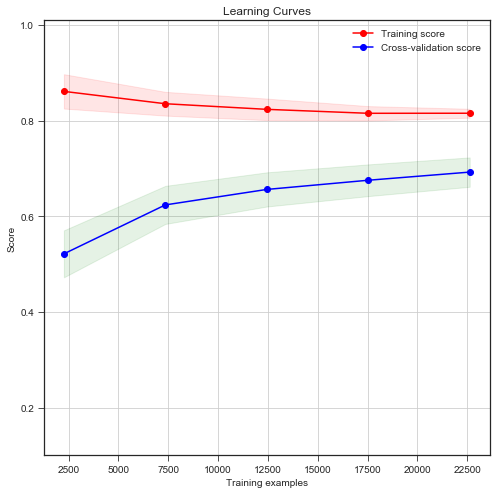

In [53]:
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)


steps = {"preprocessor" : preprocessor}
im_pipe_pre_process = add_to_pipeline(**steps)
estimator = CV_grid_model.best_estimator_.get_params()['classifier']
title = r"Learning Curves"
plot_learning_curve(estimator, title, im_pipe_pre_process.fit_transform(X_train), y_train, 
                       (0.1, 1.01), cv=cv, n_jobs=-1)

In [54]:
y_pred = evaluate_model(CV_grid_model, X_train, y_train)
y_pred

Accuracy score : 0.6548797736916548
classification_report :
                precision    recall  f1-score   support

           No     0.1440    0.8381    0.2458      1810
          Yes     0.2368    0.9737    0.3810       152
indeterminate     0.9845    0.6404    0.7760     26318

    micro avg     0.6549    0.6549    0.6549     28280
    macro avg     0.4551    0.8174    0.4676     28280
 weighted avg     0.9267    0.6549    0.7400     28280



array(['indeterminate', 'No', 'No', ..., 'No', 'No', 'indeterminate'],
      dtype=object)

In [55]:
#Drop ReportID column, as in case of train
salesReportDataTest_dropped_attr_no_dup = salesReportDataTest.drop(['ReportID'], axis=1)

# Datatype conversions
salesReportDataTest_dropped_attr_no_dup[cat_col] = covert_var(salesReportDataTest_dropped_attr_no_dup[cat_col], "cat")
salesReportDataTest_dropped_attr_no_dup[num_col] = covert_var(salesReportDataTest_dropped_attr_no_dup[num_col], "num_float")    

X_test = salesReportDataTest_dropped_attr_no_dup.drop('Suspicious', axis=1)
y_test = salesReportDataTest_dropped_attr_no_dup['Suspicious']


y_test_pred = evaluate_model(CV_grid_model, X_test, y_test)
y_test_pred

Accuracy score : 0.6505948653725736
classification_report :
                precision    recall  f1-score   support

           No     0.1298    0.8016    0.2234       383
          Yes     0.1667    0.7407    0.2721        27
indeterminate     0.9810    0.6405    0.7750      5978

    micro avg     0.6506    0.6506    0.6506      6388
    macro avg     0.4258    0.7276    0.4235      6388
 weighted avg     0.9266    0.6506    0.7398      6388



array(['No', 'indeterminate', 'indeterminate', ..., 'No', 'No',
       'indeterminate'], dtype=object)

[[  20    5    2]
 [   4  307   72]
 [  96 2053 3829]]


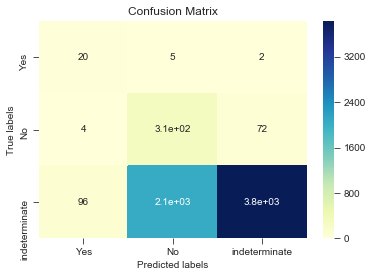

In [56]:
plot_confusion_matrix(y_test,y_test_pred)

__Observation__
1. No change in Recall, by dropping rows with multiple labels.

## Feature Engineering

### Generate SalesValuePerItem column

In [57]:
# SalesValuePerItem, represents selling price of each ProductID for a given report
salesReportDataTrain_feature_added = salesReportDataTrain_dropped_attr_no_dup.copy()
salesReportDataTrain_feature_added.insert(4, 'SalesValuePerItem', 
                                          salesReportDataTrain_feature_added['TotalSalesValue']/salesReportDataTrain_feature_added['Quantity'])
salesReportDataTrain_feature_added.head()

SalesPersonID ProductID  Quantity  TotalSalesValue  SalesValuePerItem  \
26235        C21448    PR6235     163.0           1890.0          11.595092   
9840         C22174    PR6326      82.0           1165.0          14.207317   
26954        C21236    PR6675     305.0          32915.0         107.918033   
21044        C21387    PR6253     101.0           1010.0          10.000000   
5175         C22185    PR6211     481.0           2110.0           4.386694   

          Suspicious  
26235  indeterminate  
9840   indeterminate  
26954  indeterminate  
21044  indeterminate  
5175   indeterminate

### Identify Suspicious SalesPersonID

In [58]:
# Identify Suspicious SalesPersonID, based on frequency of fault
salesReportDataTrain_feature_added_by_SalesPersonID_1 = salesReportDataTrain_feature_added[
    ['SalesPersonID', 'Suspicious']].groupby(['SalesPersonID']).apply(
    lambda x: (x['Suspicious']== 'Yes').sum()).reset_index(name='countOfSuspiciousEQYesPerGrp')

salesReportDataTrain_feature_added_by_SalesPersonID_2 = salesReportDataTrain_feature_added[
    ['SalesPersonID', 'Suspicious']].groupby(['SalesPersonID']).count().reset_index().rename(
    columns={'Suspicious':'countOfSuspiciousPerGrp'})

salesReportDataTrain_feature_added_by_SalesPersonID_3 = salesReportDataTrain_feature_added_by_SalesPersonID_1.merge(
    salesReportDataTrain_feature_added_by_SalesPersonID_2, on='SalesPersonID', how='outer')

salesReportDataTrain_feature_added_by_SalesPersonID_3['percOfSuspiciousEQYes'] = (
    salesReportDataTrain_feature_added_by_SalesPersonID_3['countOfSuspiciousEQYesPerGrp']
    /salesReportDataTrain_feature_added_by_SalesPersonID_3['countOfSuspiciousPerGrp'])*100

salesReportDataTrain_feature_added_by_SalesPersonID_3.sort_values(['percOfSuspiciousEQYes'], ascending=[0])

SalesPersonID  countOfSuspiciousEQYesPerGrp  countOfSuspiciousPerGrp  \
619        C21893                             1                        2   
557        C21818                             1                        2   
815        C22127                             2                        6   
600        C21871                             1                        3   
747        C22041                             2                        7   
708        C21994                             2                        7   
595        C21866                             1                        4   
774        C22076                             1                        4   
599        C21870                             1                        4   
36         C21163                             1                        4   
435        C21659                             1                        4   
627        C21901                             1                        5   
430        C21654                             3                       15   
805        C22114                             1                        5   
528        C21779                             1                        5   
673        C21958                             1                        5   
448        C21676                             3                       16   
847        C22168                             3                       16   
737        C22029                             2                       11   
554        C21814                             1                        6   
804        C22113                             1                        6   
856        C22178                             3                       20   
817        C22129                             1                        7   
176        C21345                             1                        7   
646        C21925                             1                        7   
645        C21923                             1                        7   
518        C21766                             1                        7   
739        C22031                             1                        7   
735        C22027                             1                        7   
976        C22332                             1                        7   
..            ...                           ...                      ...   
351        C21555                             0                        9   
350        C21554                             0                        1   
349        C21553                             0                        8   
348        C21551                             0                       23   
322        C21520                             0                        8   
323        C21521                             0                        7   
324        C21522                             0                       19   
325        C21523                             0                       10   
326        C21524                             0                       39   
327        C21525                             0                       11   
328        C21526                             0                       13   
329        C21528                             0                       33   
330        C21529                             0                       18   
331        C21530                             0                       21   
332        C21532                             0                       17   
333        C21533                             0                        4   
334        C21534                             0                       50   
335        C21535                             0                       31   
337        C21538                             0                        6   
338        C21539                             0                        3   
339        C21541                             0     

### Identify Suspicious ProductID

In [59]:
# Identify Suspicious ProductID, based on frequency of fault
salesReportDataTrain_feature_added_by_ProductID_1 = salesReportDataTrain_feature_added[
    ['ProductID', 'Suspicious']].groupby(
    ['ProductID']).apply(lambda x: (x['Suspicious']== 'Yes').sum()).reset_index(
    name='countOfSuspiciousEQYesPerGrp')

salesReportDataTrain_feature_added_by_ProductID_2 = salesReportDataTrain_feature_added[
    ['ProductID', 'Suspicious']].groupby(
    ['ProductID']).count().reset_index().rename(columns={'Suspicious':'countOfSuspiciousPerGrp'})

salesReportDataTrain_feature_added_by_ProductID_3 = salesReportDataTrain_feature_added_by_ProductID_1.merge(
    salesReportDataTrain_feature_added_by_ProductID_2, on='ProductID', how='outer')

salesReportDataTrain_feature_added_by_ProductID_3['percOfSuspiciousEQYes'] = (
    salesReportDataTrain_feature_added_by_ProductID_3['countOfSuspiciousEQYesPerGrp']/
    salesReportDataTrain_feature_added_by_ProductID_3['countOfSuspiciousPerGrp'])*100

salesReportDataTrain_feature_added_by_ProductID_3.sort_values(['percOfSuspiciousEQYes'], ascending=[0])

ProductID  countOfSuspiciousEQYesPerGrp  countOfSuspiciousPerGrp  \
10     PR6122                             1                        2   
579    PR6691                             2                       15   
404    PR6516                             1                        8   
338    PR6450                             1                       12   
325    PR6437                             2                       27   
548    PR6660                             2                       28   
457    PR6569                             1                       15   
352    PR6464                             1                       15   
400    PR6512                             2                       31   
90     PR6202                             1                       18   
384    PR6496                             1                       18   
32     PR6144                             1                       18   
47     PR6159                             1                       19   
458    PR6570                             3                       59   
439    PR6551                             1                       20   
75     PR6187                             1                       20   
69     PR6181                             2                       40   
343    PR6455                             1                       20   
378    PR6490                             2                       42   
303    PR6415                             1                       22   
88     PR6200                             1                       23   
177    PR6289                             1                       25   
406    PR6518                             2                       50   
162    PR6274                             1                       26   
102    PR6214                             1                       26   
188    PR6300                             1                       27   
158    PR6270                             1                       27   
67     PR6179                             4                      108   
413    PR6525                             1                       28   
145    PR6257                             1                       28   
..        ...                           ...                      ...   
245    PR6357                             0                      274   
244    PR6356                             0                       16   
243    PR6355                             0                        7   
242    PR6354                             0                       69   
237    PR6349                             0                       12   
236    PR6348                             0                        9   
235    PR6347                             0                       27   
234    PR6346                             0                       32   
233    PR6345                             0                       47   
232    PR6344                             0                       55   
231    PR6343                             0                       40   
230    PR6342                             0                       12   
229    PR6341                             0                        9   
228    PR6340                             0                        6   
227    PR6339                             0                       11   
225    PR6337                             0                        1   
224    PR6336                             0                       11   
223    PR6335                             0                       38   
221    PR6333                             0                        7   
220    PR6332                             0                        2   
219    PR6331                             0                      248   
218    PR6330                             0                        1   
216    PR6328                             0                       14   
215    PR6327                             0 

__Observation__

Neither any ProductID nor any SalesPersonID have direct relation with Suspicious=YES

In [60]:
salesReportDataTrain_feature_added.shape

(28390, 6)

### Distribution of Suspicious=YES, groupby SalesPersonID and ProductID

In [61]:
salesReportDataTrain_feature_added_grp_by_SPS = salesReportDataTrain_feature_added[[
    'SalesPersonID', 'ProductID', 'Suspicious', 'SalesValuePerItem']].groupby(
    ['SalesPersonID', 'ProductID', 'Suspicious'], sort=False).mean().reset_index()

salesReportDataTrain_feature_added_grp_by_SPS_pivot = salesReportDataTrain_feature_added_grp_by_SPS.groupby(
    ['SalesPersonID', 'ProductID', 'Suspicious'])['SalesValuePerItem'].aggregate('first').unstack().rename(
    columns=str).reset_index()

# Drop any row with all the following columns NAN (indeterminate, No, Yes) 
salesReportDataTrain_feature_added_grp_by_SPS_pivot_1 = salesReportDataTrain_feature_added_grp_by_SPS_pivot.dropna(
    subset=['indeterminate', 'No', 'Yes'], how='all')
salesReportDataTrain_feature_added_grp_by_SPS_pivot_1.head()

Suspicious SalesPersonID ProductID  indeterminate  No  Yes
0                 C21448    PR6235       9.712523 NaN  NaN
3                 C21448    PR6253      17.860869 NaN  NaN
50                C21448    PR6286      25.600347 NaN  NaN
57                C21448    PR6331       9.017814 NaN  NaN
94                C21448    PR6227       6.688333 NaN  NaN

In [62]:
salesReportDataTrain_feature_added_grp_by_SPS_pivot_1['max_suspicious_level'] = salesReportDataTrain_feature_added_grp_by_SPS_pivot_1[['indeterminate', 'No', 'Yes']].idxmax(axis=1)
salesReportDataTrain_feature_added_grp_by_SPS_pivot_1['min_suspicious_level'] = salesReportDataTrain_feature_added_grp_by_SPS_pivot_1[['indeterminate', 'No', 'Yes']].idxmin(axis=1)
salesReportDataTrain_feature_added_grp_by_SPS_pivot_2 = salesReportDataTrain_feature_added_grp_by_SPS_pivot_1.loc[
    salesReportDataTrain_feature_added_grp_by_SPS_pivot_1['Yes'].notnull()]
salesReportDataTrain_feature_added_grp_by_SPS_pivot_2.head()

Suspicious SalesPersonID ProductID  indeterminate        No          Yes  \
2379              C22185    PR6115            NaN  5.139348   797.727273   
2448              C22185    PR6351      78.412742       NaN  8755.900901   
2784              C22185    PR6274      34.554809       NaN    50.716846   
4800              C21993    PR6241       5.509840       NaN     0.007913   
7119              C21780    PR6253      11.050375       NaN     0.300850   

Suspicious max_suspicious_level min_suspicious_level  
2379                        Yes                   No  
2448                        Yes        indeterminate  
2784                        Yes        indeterminate  
4800              indeterminate                  Yes  
7119              indeterminate                  Yes

In [63]:
# For SalesPersonID and ProductID group, for rows having Suspicious=YES is there a pattern ?


salesReportDataTrain_feature_added_grp_by_SPS_pivot_2[(
    salesReportDataTrain_feature_added_grp_by_SPS_pivot_2['max_suspicious_level']=='Yes') | (
    salesReportDataTrain_feature_added_grp_by_SPS_pivot_2['min_suspicious_level']=='Yes')].shape[0]


# Scenarios when Suspicious=YES, but the SalesValuePerItem is min or max for a specific 
# SalesPersonIDand ProductID group

salesReportDataTrain_feature_added_grp_by_SPS_pivot_2[(
    salesReportDataTrain_feature_added_grp_by_SPS_pivot_2['max_suspicious_level']!='Yes') & (
    salesReportDataTrain_feature_added_grp_by_SPS_pivot_2['min_suspicious_level']!='Yes')].shape[0]

salesReportDataTrain_feature_added_grp_by_SPS_pivot_2[(
    salesReportDataTrain_feature_added_grp_by_SPS_pivot_2['max_suspicious_level']!='Yes') & (
    salesReportDataTrain_feature_added_grp_by_SPS_pivot_2['min_suspicious_level']!='Yes')]

142

2

Suspicious SalesPersonID ProductID  indeterminate         No       Yes  \
134044            C21220    PR6595        9.86758   0.426001   0.83014   
346317            C21256    PR6596       10.96193  17.719298  11.88000   

Suspicious max_suspicious_level min_suspicious_level  
134044            indeterminate                   No  
346317                       No        indeterminate

__Observations__
1. There can be scenarios when the Suspicious=YES, but the SalesValuePerItem is __NOT__ min or max for a specific SalesPersonID and ProductID group

In [83]:
salesReportDataTrain_feature_added_grp_by_SPS_pivot_1['ProductID_SalesPersonID'] = salesReportDataTrain_feature_added_grp_by_SPS_pivot_1[['ProductID', 'SalesPersonID']].apply(lambda x: '_'.join(x), axis=1)
data_sample = salesReportDataTrain_feature_added_grp_by_SPS_pivot_1


trace_yes = go.Scatter(x=data_sample.ProductID_SalesPersonID ,
                  y= data_sample.Yes,
                  name = 'Yes',
                  mode= 'markers')
trace_no = go.Scatter(x=data_sample.ProductID_SalesPersonID ,
                  y= data_sample.No,
                  name = 'No',
                  mode= 'markers')
trace_indeterminate = go.Scatter(x=data_sample.ProductID_SalesPersonID ,
                  y= data_sample.indeterminate,
                  name = 'indeterminate',
                  mode= 'markers')

layout = go.Layout(title = 'Distribution of Avg TotalSalesValue across Suspicious level, groupby ProductID and SalesPersonID',
                  xaxis = dict(title = 'ProductID_SalesPersonID',titlefont=dict(size=10), tickfont=dict(size=7)),
                  yaxis = dict(title = 'Average TotalSalesValue for each Suspicious level',titlefont=dict(size=10)))

data = [trace_yes, trace_no, trace_indeterminate]

fig = go.Figure(data=data, layout=layout)
iplot(fig)


### Distribution of Suspicious=YES, groupby ProductID

In [84]:
salesReportDataTrain_feature_added_grp_by_SPS = salesReportDataTrain_feature_added[[
    'ProductID', 'Suspicious', 'SalesValuePerItem']].groupby(
    ['ProductID', 'Suspicious'], sort=False).mean().reset_index()

salesReportDataTrain_feature_added_grp_by_SPS_pivot = salesReportDataTrain_feature_added_grp_by_SPS.groupby(
    ['ProductID', 'Suspicious'])['SalesValuePerItem'].aggregate('first').unstack().rename(
    columns=str).reset_index()

# Drop any row with all the following columns NAN (indeterminate, No, Yes) 
salesReportDataTrain_feature_added_grp_by_SPS_pivot_1 = salesReportDataTrain_feature_added_grp_by_SPS_pivot.dropna(
    subset=['indeterminate', 'No', 'Yes'], how='all')
salesReportDataTrain_feature_added_grp_by_SPS_pivot_1.head()

Suspicious ProductID  indeterminate         No        Yes
0             PR6235      10.063675   5.683255   0.805074
1             PR6326      21.184943        NaN        NaN
2             PR6675      30.192171  73.351133   3.306189
3             PR6253      16.202900  15.260609  18.334012
4             PR6211      11.426282   7.251701        NaN

In [85]:
salesReportDataTrain_feature_added_grp_by_SPS_pivot_1['max_suspicious_level'] = salesReportDataTrain_feature_added_grp_by_SPS_pivot_1[['indeterminate', 'No', 'Yes']].idxmax(axis=1)
salesReportDataTrain_feature_added_grp_by_SPS_pivot_1['min_suspicious_level'] = salesReportDataTrain_feature_added_grp_by_SPS_pivot_1[['indeterminate', 'No', 'Yes']].idxmin(axis=1)
salesReportDataTrain_feature_added_grp_by_SPS_pivot_2 = salesReportDataTrain_feature_added_grp_by_SPS_pivot_1.loc[
    salesReportDataTrain_feature_added_grp_by_SPS_pivot_1['Yes'].notnull()]
salesReportDataTrain_feature_added_grp_by_SPS_pivot_2.head()

Suspicious ProductID  indeterminate         No         Yes  \
0             PR6235      10.063675   5.683255    0.805074   
2             PR6675      30.192171  73.351133    3.306189   
3             PR6253      16.202900  15.260609   18.334012   
5             PR6596      14.887043  16.172320    7.087059   
7             PR6115       8.029801   6.610866  175.122059   

Suspicious max_suspicious_level min_suspicious_level  
0                 indeterminate                  Yes  
2                            No                  Yes  
3                           Yes                   No  
5                            No                  Yes  
7                           Yes                   No

In [86]:
# For ProductID group, for rows having Suspicious=YES is there a pattern ?


salesReportDataTrain_feature_added_grp_by_SPS_pivot_2[(
    salesReportDataTrain_feature_added_grp_by_SPS_pivot_2['max_suspicious_level']=='Yes') | (
    salesReportDataTrain_feature_added_grp_by_SPS_pivot_2['min_suspicious_level']=='Yes')].shape[0]


# Scenarios when Suspicious=YES, but the SalesValuePerItem is min or max for a specific 
# SalesPersonIDand ProductID group

salesReportDataTrain_feature_added_grp_by_SPS_pivot_2[(
    salesReportDataTrain_feature_added_grp_by_SPS_pivot_2['max_suspicious_level']!='Yes') & (
    salesReportDataTrain_feature_added_grp_by_SPS_pivot_2['min_suspicious_level']!='Yes')].shape[0]

salesReportDataTrain_feature_added_grp_by_SPS_pivot_2[(
    salesReportDataTrain_feature_added_grp_by_SPS_pivot_2['max_suspicious_level']!='Yes') & (
    salesReportDataTrain_feature_added_grp_by_SPS_pivot_2['min_suspicious_level']!='Yes')]

103

4

Suspicious ProductID  indeterminate         No        Yes  \
23            PR6621       6.104801   5.127644   5.651376   
32            PR6633      19.766651   9.633220  12.502821   
103           PR6582      10.090212  20.432856  12.658095   
211           PR6181       7.232038  28.903082  13.847720   

Suspicious max_suspicious_level min_suspicious_level  
23                indeterminate                   No  
32                indeterminate                   No  
103                          No        indeterminate  
211                          No        indeterminate

__Observations__

1. There can be scenarios when the Suspicious=YES, but the SalesValuePerItem is __NOT__ min or max for a specific ProductID group

In [87]:
data_sample = salesReportDataTrain_feature_added_grp_by_SPS_pivot_1


trace_yes = go.Scatter(x=data_sample.ProductID ,
                  y= data_sample.Yes,
                  name = 'Yes',
                  mode= 'markers')
trace_no = go.Scatter(x=data_sample.ProductID ,
                  y= data_sample.No,
                  name = 'No',
                  mode= 'markers')
trace_indeterminate = go.Scatter(x=data_sample.ProductID ,
                  y= data_sample.indeterminate,
                  name = 'indeterminate',
                  mode= 'markers')

layout = go.Layout(title = 'Distribution of Avg TotalSalesValue acros Suspicious level, groupby ProductID',
                  xaxis = dict(title = 'ProductID'),
                  yaxis = dict(title = 'Average TotalSalesValue for each Suspicious level'))

data = [trace_yes, trace_no, trace_indeterminate]

fig = go.Figure(data=data, layout=layout)
iplot(fig)


__Observations__
1. Suspicious=Yes, in scenarios when the avg TotalSalesValue is either very high or very low for all ProductId's. 

### Derive new column :  

How current totalValue of transaction is related to average totalValue of transaction grouped by 'SalesPersonID', 'ProductID'

In [88]:
aggregations_1 = {
    'TotalSalesValue':'mean'
}

salesReportDataTrain_feature_added_grp_mean_quantity = salesReportDataTrain_feature_added.groupby(
    ['SalesPersonID', 'ProductID']).agg(aggregations_1).reset_index().rename(columns={
    'TotalSalesValue': 'Avg_TotalSalesValue'})
salesReportDataTrain_feature_added_grp_mean_quantity.head()

SalesPersonID ProductID  Avg_TotalSalesValue
0        C21116    PR6112          1702.500000
1        C21116    PR6253          2938.333333
2        C21116    PR6294          1662.500000
3        C21116    PR6297          2300.000000
4        C21118    PR6202        197923.750000

In [89]:
salesReportDataTrain_feature_added_AVG_1 = salesReportDataTrain_feature_added.merge(
    salesReportDataTrain_feature_added_grp_mean_quantity, on=['SalesPersonID', 'ProductID'])

salesReportDataTrain_feature_added_AVG_1.insert(
    5, 'tot_Sal_Val_to_Avg_Tot_Sal_Val_for_grp', salesReportDataTrain_feature_added_AVG_1['TotalSalesValue'] 
    / salesReportDataTrain_feature_added_AVG_1['Avg_TotalSalesValue'])

salesReportDataTrain_feature_added_AVG_2 = salesReportDataTrain_feature_added_AVG_1.drop(
    'Avg_TotalSalesValue', axis=1)

salesReportDataTrain_feature_added_AVG_2.head()

SalesPersonID ProductID  Quantity  TotalSalesValue  SalesValuePerItem  \
0        C21448    PR6235     163.0           1890.0          11.595092   
1        C21448    PR6235     126.0           1200.0           9.523810   
2        C21448    PR6235     254.0           2140.0           8.425197   
3        C21448    PR6235     135.0           1230.0           9.111111   
4        C21448    PR6235     108.0           1070.0           9.907407   

   tot_Sal_Val_to_Avg_Tot_Sal_Val_for_grp     Suspicious  
0                                1.254980  indeterminate  
1                                0.796813  indeterminate  
2                                1.420983  indeterminate  
3                                0.816733  indeterminate  
4                                0.710491  indeterminate

In [90]:
salesReportDataTrain_feature_added_AVG_2[salesReportDataTrain_feature_added_AVG_2['Suspicious']=='Yes']

SalesPersonID ProductID  Quantity  TotalSalesValue  SalesValuePerItem  \
387          C22215    PR6115     110.0          46780.0         425.272727   
394          C21654    PR6490     153.0          71760.0         469.019608   
399          C21654    PR6490     111.0          15740.0         141.801802   
517          C21579    PR6399  103155.0          35435.0           0.343512   
741          C22058    PR6621     109.0            616.0           5.651376   
830          C21456    PR6298     338.0          11915.0          35.251479   
979          C21853    PR6550   72877.0           2480.0           0.034030   
1025         C21953    PR6187    2544.0           1140.0           0.448113   
1309         C22263    PR6525  103645.0           1475.0           0.014231   
1357         C21453    PR6300   38717.0          21790.0           0.562802   
1503         C22030    PR6259   11389.0           1100.0           0.096584   
1536         C22037    PR6115     101.0           8905.0          88.168317   
1769         C21866    PR6233     101.0          19035.0         188.465347   
1943         C21938    PR6383      93.0           1545.0          16.612903   
2065         C22185    PR6351     111.0         971905.0        8755.900901   
2122         C21992    PR6551  259217.0           8215.0           0.031692   
2316         C21636    PR6444     470.0         270320.0         575.148936   
2449         C21699    PR6678     343.0           1010.0           2.944606   
2456         C21395    PR6350     102.0           1285.0          12.598039   
3494         C21872    PR6260   89454.0           1345.0           0.015036   
3603         C21536    PR6181     100.0           2730.0          27.300000   
3755         C22126    PR6633    7977.0          99735.0          12.502821   
3832         C22030    PR6199    1425.0           1025.0           0.719298   
3928         C21948    PR6552     103.0          43435.0         421.699029   
4685         C21286    PR6249     107.0         280045.0        2617.242991   
4925         C21875    PR6570   55433.0           7675.0           0.138455   
4927         C21875    PR6570     155.0           7675.0          49.516129   
4986         C22226    PR6159    2879.0           1475.0           0.512331   
5218         C22293    PR6601     207.0         178465.0         862.149758   
5447         C21191    PR6358   45653.0           4700.0           0.102951   
...             ...       ...       ...              ...                ...   
23212        C22031    PR6690     385.0           1130.0           2.935065   
23265        C21938    PR6399     105.0           1525.0          14.523810   
23517        C21676    PR6570     102.0          13380.0         131.176471   
23558        C21938    PR6368     105.0           1805.0          17.190476   
23646        C22112    PR6415  126716.0           3745.0           0.029554   
23763        C22030    PR6122    2100.0           1035.0           0.492857   
23860        C21901    PR6117     112.0          14500.0         129.464286   
23941        C21163    PR6213   34611.0          12485.0           0.360723   
24167        C21994    PR6496   37860.0          11505.0           0.303883   
24361        C22178    PR6253   10420.0           1525.0           0.146353   
24365        C22178    PR6253     971.0           1060.0           1.091658   
24469        C21220    PR6279   34927.0           8145.0           0.233201   
24540        C22168    PR6518     205.0          47745.0         232.902439   
24556        C21769    PR6703   18243.0           1380.0           0.075645   
24653        C22102    PR6353    7600.0           7875.0           1.036184   
24663        C22076    PR6474     102.0           4435.0          43.480392   
24726        C22041    PR6579   26900.0           3885.0           0.144424   
24944        C21994    PR6253     446.0           1300.0           2.914798   
24964        C22228    PR6450  107594.0           6120.0

How current totalValue of transaction is related to average totalValue of transaction grouped by 'SalesPersonID',

In [91]:
aggregations_1 = {
    'TotalSalesValue':'mean'
}

salesReportDataTrain_feature_added_grp_mean_quantity_by_salesP = salesReportDataTrain_feature_added.groupby(
    ['SalesPersonID']).agg(aggregations_1).reset_index().rename(columns={
    'TotalSalesValue': 'Avg_TotalSalesValue'})
salesReportDataTrain_feature_added_grp_mean_quantity_by_salesP.head()

SalesPersonID  Avg_TotalSalesValue
0        C21116          2230.625000
1        C21118        197923.750000
2        C21119          1160.000000
3        C21121          5710.227273
4        C21122          1842.608696

In [92]:
salesReportDataTrain_feature_added_AVGby_salesP_1 = salesReportDataTrain_feature_added.merge(
    salesReportDataTrain_feature_added_grp_mean_quantity_by_salesP, on=['SalesPersonID'])

salesReportDataTrain_feature_added_AVGby_salesP_1.insert(
    5, 'tot_Sal_Val_to_Avg_Tot_Sal_Val_for_grp_salesP', salesReportDataTrain_feature_added_AVGby_salesP_1['TotalSalesValue'] 
    / salesReportDataTrain_feature_added_AVGby_salesP_1['Avg_TotalSalesValue'])

salesReportDataTrain_feature_added_AVGby_salesP_2 = salesReportDataTrain_feature_added_AVGby_salesP_1.drop(
    'Avg_TotalSalesValue', axis=1)

salesReportDataTrain_feature_added_AVGby_salesP_2.head()

SalesPersonID ProductID  Quantity  TotalSalesValue  SalesValuePerItem  \
0        C21448    PR6235     163.0           1890.0          11.595092   
1        C21448    PR6286    4037.0          99125.0          24.554124   
2        C21448    PR6235     126.0           1200.0           9.523810   
3        C21448    PR6331     570.0           4580.0           8.035088   
4        C21448    PR6331    1447.0          17760.0          12.273670   

   tot_Sal_Val_to_Avg_Tot_Sal_Val_for_grp_salesP     Suspicious  
0                                       0.057757  indeterminate  
1                                       3.029201  indeterminate  
2                                       0.036671  indeterminate  
3                                       0.139962  indeterminate  
4                                       0.542735  indeterminate

In [93]:
salesReportDataTrain_feature_added_AVGby_salesP_2.to_csv(
    path_or_buf='/Users/samyam/Documents/Samya/GIT/insofe/Final_PHD/output/salesReportDataTrain_feature_added_AVGby_salesP_2_1.csv', 
    index=False)

### How is the sales person sales, order by reportID?

## Backup